In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("libraries imported")

libraries imported


Data Collection

In [2]:
df = pd.read_csv("Used_Bikes.csv")
df.head()
# df.info()
# df.isnull().sum()
# df.duplicated().sum()
df.describe(include="object")
# df.shape

,bike_name,city,owner,brand
count,32648,32648,32648,32648
unique,471,443,4,23
top,Bajaj Pulsar 150cc,Delhi,First Owner,Bajaj
freq,2776,7318,29964,11213


Data Cleaning and Pre-processing

In [3]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   object 
 1   price       7324 non-null   float64
 2   city        7324 non-null   object 
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   object 
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   object 
dtypes: float64(4), object(4)
memory usage: 515.0+ KB


### EDA

In [4]:
len(df.city.unique())
jaipur = df[df["city"] == "Jaipur"]
jaipur.head()
jaipur.shape[0]

299

In [5]:
jaipur['brand'].unique().shape[0]

13

In [6]:
jaipur['brand'].value_counts()

brand
Hero               91
Bajaj              63
Honda              39
TVS                29
Yamaha             27
Royal Enfield      23
KTM                 7
Mahindra            6
Harley-Davidson     6
Suzuki              4
Benelli             2
Kawasaki            1
Hyosung             1
Name: count, dtype: int64

In [7]:
jaipur['price'].min()
jaipur['price'].max()
jaipur['price'].mean()

np.float64(62213.371237458196)

In [8]:
min_price = jaipur[jaipur['price'] == jaipur['price'].min()]
min_price

,bike_name,price,city,kms_driven,owner,age,power,brand
2696,Hero Passion Plus 100cc,14000.0,Jaipur,70756.0,First Owner,13.0,100.0,Hero
9029,Hero Passion 100cc,14000.0,Jaipur,50000.0,Second Owner,19.0,100.0,Hero


In [9]:
max_price = jaipur[jaipur['price'] == jaipur['price'].max()]
max_price

,bike_name,price,city,kms_driven,owner,age,power,brand
617,Suzuki Hayabusa 1300cc,1260000.0,Jaipur,17000.0,First Owner,4.0,1300.0,Suzuki


In [10]:
jpr_budget_bike = jaipur[jaipur['price'] <= jaipur['price'].mean()]
jpr_budget_bike.head()


,bike_name,price,city,kms_driven,owner,age,power,brand
47,Mahindra Centuro NXT 110cc,28000.0,Jaipur,45000.0,First Owner,2.0,110.0,Mahindra
134,Suzuki Gixxer SF 150cc,47000.0,Jaipur,70000.0,First Owner,6.0,150.0,Suzuki
490,Honda CBR 150R 150cc,55000.0,Jaipur,2000.0,First Owner,9.0,150.0,Honda
754,Hero CBZ 150cc,21000.0,Jaipur,50000.0,First Owner,10.0,150.0,Hero
960,Honda CB Shine 125cc,37000.0,Jaipur,18110.0,First Owner,6.0,125.0,Honda


In [11]:
jpr_budget_bike['brand'].unique()
jpr_budget_bike[jpr_budget_bike['brand'] == "Royal Enfield"]

,bike_name,price,city,kms_driven,owner,age,power,brand
7352,Royal Enfield Thunderbird 350cc,55000.0,Jaipur,4779.0,First Owner,11.0,350.0,Royal Enfield


In [12]:
df['brand'].value_counts()[df['brand'].value_counts() < 10].sum()

np.int64(17)

In [13]:
brand_list = list(df['brand'].value_counts()[df['brand'].value_counts() >= 10].index)
brand_list

['Bajaj',
 'Royal Enfield',
 'Hero',
 'Honda',
 'Yamaha',
 'TVS',
 'KTM',
 'Suzuki',
 'Harley-Davidson',
 'Kawasaki',
 'Hyosung',
 'Mahindra',
 'Benelli',
 'Triumph',
 'Ducati',
 'BMW']

In [14]:
df = df[df['brand'].isin(brand_list)]
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
df.drop(['bike_name','city'], axis=1, inplace=True, errors='ignore')
df.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,11000.0,First Owner,4.0,350.0,Royal Enfield
2,600000.0,110.0,First Owner,8.0,675.0,Triumph
3,65000.0,16329.0,First Owner,4.0,180.0,TVS
4,80000.0,10000.0,First Owner,3.0,150.0,Yamaha


In [17]:
df.dtypes 

price         float64
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [18]:
df['owner'].value_counts()

owner
First Owner             6628
Second Owner             586
Third Owner               83
Fourth Owner Or More      10
Name: count, dtype: int64

In [19]:
owner_dt = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth Owner': 4, 'Fourth Owner Or More': 5}
owner_dt

{'First Owner': 1,
 'Second Owner': 2,
 'Third Owner': 3,
 'Fourth Owner': 4,
 'Fourth Owner Or More': 5}

In [20]:
owner_column = []
for ownership in df['owner']:
    print(owner_dt[ownership])

1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
3
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1


In [21]:
df['owner'] = df['owner'].map(owner_dt,na_action='ignore')

In [22]:
df['owner'].head()

0    1
1    1
2    1
3    1
4    1
Name: owner, dtype: int64

### Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [24]:
encoder = LabelEncoder()

In [25]:
# df['brand'] = encoder.fit(df['brand']) # fit is used to learn the encoding

In [26]:
df['brand'] = encoder.fit_transform(df['brand']) # transform is used to apply the encoding

In [27]:
output = encoder.fit_transform(df['brand'])
output
output.shape

(7307,)

In [28]:
df['brand'] = output

In [29]:
df['brand'].head()

0    13
1    11
2    14
3    13
4    15
Name: brand, dtype: int64

In [30]:
df.dtypes

price         float64
kms_driven    float64
owner           int64
age           float64
power         float64
brand           int64
dtype: object

In [31]:
df.isnull().sum()

price         0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [32]:
y = df[['price']]
x = df.drop('price', axis=1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5845, 5), (1462, 5), (5845, 1), (1462, 1))

### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lnr = LinearRegression()

In [38]:
lnr.fit(x_train, y_train)

LinearRegression()

In [39]:
lnr.score(x_train, y_train)

0.6820871663817901

In [40]:
lnr.score(x_test, y_test)

0.6346441553306843

In [41]:
# Model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, lnr.predict(x_test))
mae = mean_absolute_error(y_test, lnr.predict(x_test))
r2 = r2_score(y_test, lnr.predict(x_test))

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2) # formula = 1 - (SSR/SST) where ssr = sum of squared residuals and sst = sum of squared total

# Why adjusted r2?
# r2 is biased towards the number of features in the model. It will always increase with the number of features.


Mean Squared Error:  6724163822.496128
Mean Absolute Error:  38320.40059617004
R2 Score:  0.6346441553306843


In [42]:
# Adjusted R2 = 1 - (1 - r2) * (n-1)/(n-p-1) where n = number of samples and p = number of features
adj_r2 = 1 - (1 - r2) * (x_test.shape[0] - 1)/(x_test.shape[0] - x_test.shape[1] - 1)
adj_r2

0.6333894992706935

### Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [44]:
# Initiating classes or object creation
ply = PolynomialFeatures(degree=2)
lnr = LinearRegression()

In [45]:
# Data Transformation(Polynomial)
# Polynomial Transformation is used to convert the non-linear data to linear data

x_train_poly = ply.fit_transform(x_train)
x_test_poly = ply.fit_transform(x_test)
print("data is transformed")

data is transformed


In [46]:
# Model Training

lnr.fit(x_train_poly, y_train)

LinearRegression()

In [47]:
round(lnr.score(x_train_poly, y_train) * 100, 2) 

80.38

In [48]:
round(lnr.score(x_test_poly, y_test) * 100, 2)

76.57

### Lasso & Ridge Regression

In [51]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [81]:
lasso = Lasso(alpha=100)
ridge = Ridge(alpha=100)

In [82]:
# Model Training

lasso.fit(x_train_poly, y_train)
ridge.fit(x_train_poly, y_train)

Ridge(alpha=100)

In [83]:
# Model Evaluation

print("Lasso Train Score: ", round(lasso.score(x_train_poly, y_train) * 100, 2))
print("Lasso Test Score: ", round(lasso.score(x_test_poly, y_test) * 100, 2))

Lasso Train Score:  80.37
Lasso Test Score:  76.6


In [84]:
print("Ridge Train Score: ", round(ridge.score(x_train_poly, y_train) * 100 , 2))
print("Ridge Test Score: ", round(ridge.score(x_test_poly, y_test) * 100, 2) )

Ridge Train Score:  80.36
Ridge Test Score:  76.61


In [86]:
y_pred = lasso.predict(x_test_poly)
y_pred

array([ 63716.45215104,  23346.96952894,  21663.59805652, ...,
       690138.3379398 ,  52578.90117101,  29838.6333749 ])

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

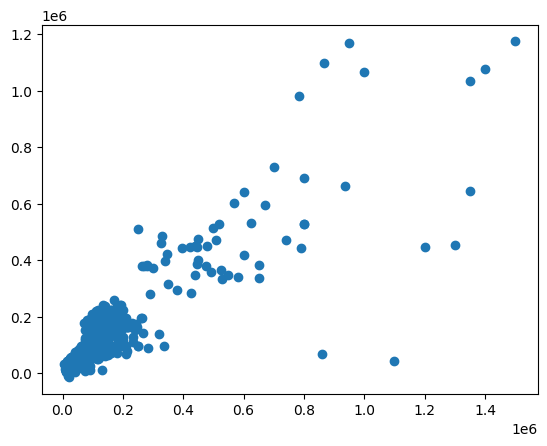

In [89]:
plt.scatter(y_test, y_pred)

In [95]:
# Residual calculation

residual = y_test['price'] - y_pred

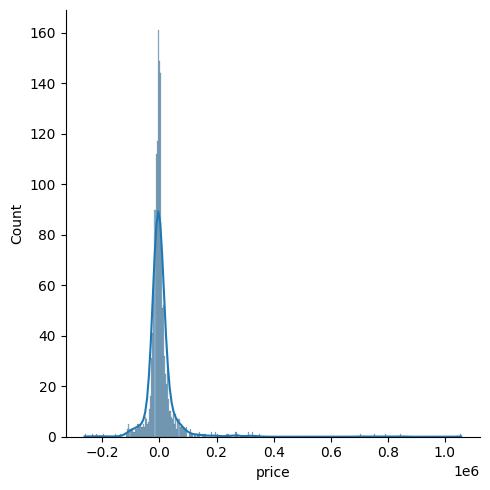

In [97]:
# Residual Distribution Plot

sns.displot(residual, kde=True)

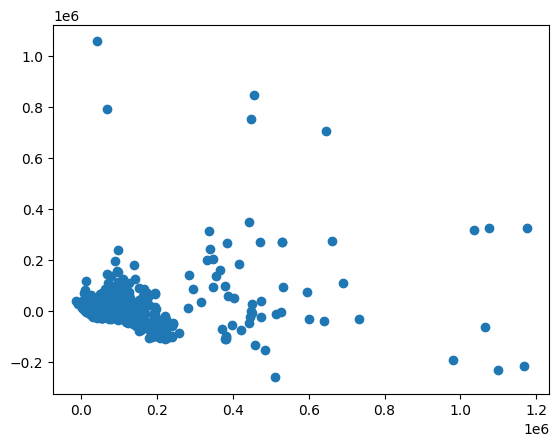

In [99]:
plt.scatter(y_pred, residual)

<Axes: ylabel='price'>

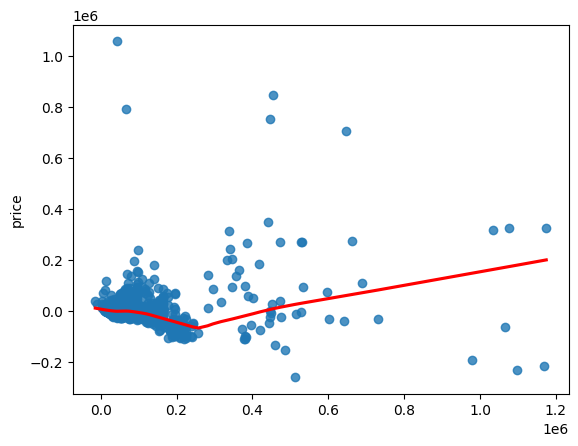

In [108]:
sns.regplot(x = y_pred,y = residual, lowess=True, line_kws={'color': 'red'})